In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import nltk


In [2]:
label_positive = 1 
label_netral = 0
label_negative = -1

In [3]:
df = pd.read_csv(r'lexiconLabelling.csv')
df.head()

,Unnamed: 0,Komentar,Label,TOKENIZATION,STOP_REMOVAL,STEMMER,Komentar_Final
0,0,keras seksual definisi tuju korban logika nola...,positif,"['kekerasan', 'seksual', 'kan', 'memang', 'def...","['kekerasan', 'seksual', 'definisinya', 'perse...","['keras', 'seksual', 'definisi', 'tuju', 'korb...",keras seksual definisi tuju korban logika nola...
1,1,dekat zinah atur pasal dl sat demokrasi tdak l...,positif,"['mendekati', 'zinah', 'aturan', 'pasal', 'dl'...","['mendekati', 'zinah', 'aturan', 'pasal', 'dl'...","['dekat', 'zinah', 'atur', 'pasal', 'dl', 'sat...",dekat zinah atur pasal dl sat demokrasi tdak l...
2,2,law is art rinci gampang belok,positif,"['law', 'is', 'an', 'art', 'rinci', 'gampang',...","['law', 'is', 'art', 'rinci', 'gampang', 'dibe...","['law', 'is', 'art', 'rinci', 'gampang', 'belok']",law is art rinci gampang belok
3,3,tetap keras seksualitas,negatif,"['tetapkan', 'kekerasan', 'seksualitas']","['tetapkan', 'kekerasan', 'seksualitas']","['tetap', 'keras', 'seksualitas']",tetap keras seksualitas
4,4,cocok terap dikemendikbud dpr,positif,"['cocok', 'diterapkan', 'dikemendikbud', 'dpr']","['cocok', 'diterapkan', 'dikemendikbud', 'dpr']","['cocok', 'terap', 'dikemendikbud', 'dpr']",cocok terap dikemendikbud dpr


In [4]:
df = df.drop(df.columns[[0, 4]], axis=1)
df.head()

,Komentar,Label,TOKENIZATION,STEMMER,Komentar_Final
0,keras seksual definisi tuju korban logika nola...,positif,"['kekerasan', 'seksual', 'kan', 'memang', 'def...","['keras', 'seksual', 'definisi', 'tuju', 'korb...",keras seksual definisi tuju korban logika nola...
1,dekat zinah atur pasal dl sat demokrasi tdak l...,positif,"['mendekati', 'zinah', 'aturan', 'pasal', 'dl'...","['dekat', 'zinah', 'atur', 'pasal', 'dl', 'sat...",dekat zinah atur pasal dl sat demokrasi tdak l...
2,law is art rinci gampang belok,positif,"['law', 'is', 'an', 'art', 'rinci', 'gampang',...","['law', 'is', 'art', 'rinci', 'gampang', 'belok']",law is art rinci gampang belok
3,tetap keras seksualitas,negatif,"['tetapkan', 'kekerasan', 'seksualitas']","['tetap', 'keras', 'seksualitas']",tetap keras seksualitas
4,cocok terap dikemendikbud dpr,positif,"['cocok', 'diterapkan', 'dikemendikbud', 'dpr']","['cocok', 'terap', 'dikemendikbud', 'dpr']",cocok terap dikemendikbud dpr


In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Komentar_Final'], df['Label'], test_size = 0.2,random_state = 20)
# random_state = 20 menyatakan kita akan mendapatkan output yang sama dengan saat pertama kali membuat pemisahan.

In [6]:
df_train = pd.DataFrame()
df_train['Sentiment'] = train_X
df_train['Label'] = train_Y

df_test = pd.DataFrame()
df_test['Sentiment'] = test_X
df_test['Label'] = test_Y

In [7]:
def convert(label):
  if label == 'positif':
    return 1
  elif label == 'netral':
    return 0
  else:
    return -1

df_train['Label'] = train_Y.apply(convert)
df_test['Label'] = test_Y.apply(convert)

In [8]:
# TF-IDF
tfidf_vect = TfidfVectorizer(max_features = 5000)
# tfidf_vect.fit(df_train['Sentiment'])
tfidf_vect.fit(df['Komentar_Final'])


TfidfVectorizer(max_features=5000)

In [9]:
tfidf_vect

TfidfVectorizer(max_features=5000)

In [10]:
print()
print("selected words as feature : ")
print("----------------------------")
print(tfidf_vect.get_feature_names())
print()


selected words as feature : 
----------------------------
['abai', 'aborsi', 'ada', 'adan', 'adh', 'adil', 'adl', 'adu', 'aduh', 'advokasi', 'adzab', 'agama', 'agamais', 'ahahaha', 'ahklak', 'ahli', 'ajar', 'aju', 'akai', 'akal', 'akar', 'akhirat', 'akhsan', 'akibat', 'aksi', 'alah', 'alaikum', 'alami', 'alat', 'aldo', 'alesanya', 'alhamdulilah', 'alias', 'alih', 'aluxes', 'amal', 'aman', 'amat', 'ambigu', 'ambil', 'amburadul', 'amin', 'anak', 'ancam', 'anda', 'andarwati', 'andi', 'ane', 'anehny', 'angaran', 'angota', 'angotanya', 'anjur', 'anu', 'apa', 'apadaya', 'api', 'arab', 'arah', 'argumen', 'argumentum', 'art', 'asalamualaikum', 'asatgfiruloh', 'asnawi', 'at', 'atas', 'atur', 'aturany', 'aturanya', 'aufa', 'awi', 'ayam', 'ayat', 'ayo', 'azab', 'azas', 'babad', 'baca', 'bacod', 'badan', 'bagus', 'bahas', 'bahasa', 'baik', 'baju', 'bales', 'banding', 'bang', 'bank', 'bantu', 'banyak', 'banyakin', 'baris', 'bas', 'basuki', 'bawa', 'bawah', 'bayar', 'bdoa', 'beban', 'bebas', 'becus

C:\Users\ASUS\.conda\envs\aslan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'keras': 503, 'seksual': 1005, 'definisi': 222, 'tuju': 1172, 'korban': 540, 'logika': 606, 'nolak': 784, 'lawan': 580, 'dekat': 225, 'zinah': 1238, 'atur': 67, 'pasal': 830, 'dl': 263, 'sat': 987, 'demokrasi': 227, 'tdak': 1115, 'layak': 581, 'isi': 419, 'penting': 851, 'tingi': 1147, 'maslahat': 643, 'masyarakat': 644, 'jadi': 433, 'tameng': 1102, 'oknum': 803, 'mengunakan': 669, 'media': 651, 'skrang': 1050, 'bicara': 127, 'sembarang': 1015, 'law': 579, 'is': 418, 'art': 61, 'rinci': 964, 'gampang': 320, 'belok': 112, 'tetap': 1135, 'seksualitas': 1006, 'cocok': 200, 'terap': 1127, 'dikemendikbud': 248, 'dpr': 276, 'pakai': 818, 'anak': 42, 'sekolah': 1003, 'mahasiswa': 619, 'rok': 972, 'lutut': 613, 'ganti': 321, 'tri': 1158, 'bubar': 161, 'ragu': 936, 'lapor': 573, 'usul': 1209, 'lindung': 600, 'hukum': 386, 'polemik': 900, 'pdhal': 838, 'tingal': 1144, 'revisi': 956, 'maf': 615, 'diusulkn': 261, 'partai': 829, 'gmn': 342, 'kbrnya': 485, 'presenter': 915, 'suka': 1076, 'motong': 

In [12]:
print("jumlah data training : ")
print(len(train_X))
print()

print("jumlah data test : ") 
print(len(test_X))
print() 

jumlah data training : 
512

jumlah data test : 
128



In [13]:
train_X_tfidf = tfidf_vect.transform(df_train['Sentiment'])
test_X_tfidf = tfidf_vect.transform(df_test['Sentiment'])

In [14]:
# tfidf_mat = tfidf_vect.transform(df['Komentar_Final']).toarray()
tfidf_mat = tfidf_vect.transform(df_train['Sentiment']).toarray()
# tfidf_mat = tfidf_vect.transform(df_test['Sentiment']).toarray()

terms = tfidf_vect.get_feature_names()

# menjumlahkan tfidf dari tiap kata/term di semua dataset
sums = tfidf_mat.sum(axis=0)

# menampilkan jumlah tfidf dari tiap kata yang ada di dataset
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','TF-IDF'])


In [15]:
ranking_br=ranking.sort_values('TF-IDF', ascending=False)
print(ranking_br)

          term     TF-IDF
1172      tuju  23.757856
67        atur  18.316195
540     korban  16.769278
503      keras  15.890520
1005   seksual  14.932381
...        ...        ...
1148      tipe   0.000000
255   disamain   0.000000
682   mikirnya   0.000000
231      depak   0.000000
856   perbutan   0.000000

[1239 rows x 2 columns]


In [16]:
ranking_br.to_csv(r'tfidf_traintiga.csv')

In [17]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(train_X_tfidf,df_train['Label'])

MultinomialNB()

In [18]:
predict = model.predict(test_X_tfidf)
acc = (accuracy_score(df_test['Label'],predict))*100

print(round(acc,2),'%')

87.5 %


In [19]:
conf_matrix = confusion_matrix(df_test['Label'], predict)
print("Confusion Matrix : ") 
print(conf_matrix)

Confusion Matrix : 
[[51  0 10]
 [ 0  3  4]
 [ 2  0 58]]


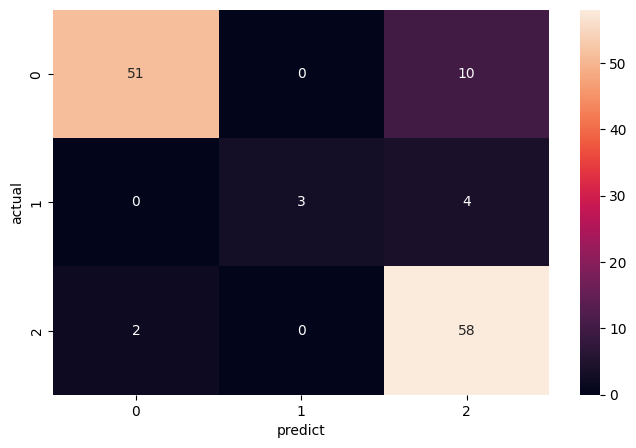

In [20]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(df_test['Label'], predict), annot=True, fmt=".0f",ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.savefig(r"confusion matrix.png")
plt.show()

In [21]:
from sklearn.metrics import classification_report
# Accuracy, Precision, Recall, f1-score
print ("\nHere is the classification report:") 
print (classification_report(df_test['Label'], predict))


Here is the classification report:
              precision    recall  f1-score   support

          -1       0.96      0.84      0.89        61
           0       1.00      0.43      0.60         7
           1       0.81      0.97      0.88        60

    accuracy                           0.88       128
   macro avg       0.92      0.74      0.79       128
weighted avg       0.89      0.88      0.87       128



In [22]:
# menghitung jumlah label positif dan negatif pada data test setelah hasil prediksi model
test_after_nb_count_label = collections.Counter(predict)
juml_pos_nb= test_after_nb_count_label[label_positive]
juml_net_nb= test_after_nb_count_label[label_netral]
juml_neg_nb = test_after_nb_count_label[label_negative]

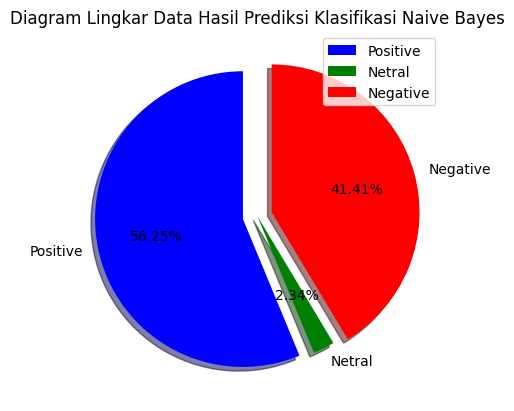

In [30]:
#pie chart analisis sentimen
labels = ['Positive','Netral','Negative']
Category = [juml_pos_nb,juml_net_nb, juml_neg_nb]
fig, ax = plt.subplots()
color = ['blue','green', 'red']
plt.pie(Category, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0.1))
plt.title('Diagram Lingkar Data Hasil Prediksi Klasifikasi Naive Bayes')
plt.legend()
plt.savefig(r"pie_nbdtiga.png")
plt.show()

In [31]:
kamus_kata = pd.read_csv(r'tfidf_traintiga.csv')
kamus_kata.head(15)

,Unnamed: 0,term,TF-IDF
0,1172,tuju,23.757856
1,67,atur,18.316195
2,540,korban,16.769278
3,503,keras,15.890520
4,1005,seksual,14.932381
5,1076,suka,12.989420
6,871,permendikbud,12.758721
7,1238,zinah,12.619061
8,568,laku,12.356357
9,429,iya,11.393849


In [32]:
del kamus_kata['Unnamed: 0']
kamus_kata.head(15)

,term,TF-IDF
0,tuju,23.757856
1,atur,18.316195
2,korban,16.769278
3,keras,15.890520
4,seksual,14.932381
5,suka,12.989420
6,permendikbud,12.758721
7,zinah,12.619061
8,laku,12.356357
9,iya,11.393849


In [33]:
import pickle
pickle.dump(model,
            open('model_nbtiga.pkl', 'wb'),
            protocol=4)

In [34]:
pickle.dump(tfidf_vect,
            open('tfidf.pkl', 'wb'),
            protocol=4)